## Dataset Description

You have been provided power consumption data of 1000 households. 

Attribute Information:

1.date: Date in format dd/mm/yyyy 

2.time: time in format hh:mm:ss 

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

**Problem Statement ** Cluster the households using any clustering algorithm based on their power consumption and give analysis of your clusters.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pds

In [2]:
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
df = pd.read_csv('attachment_power_consumption_lyst4424.csv', sep=';')

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
994,17/12/2006,09:58:00,2.288,0.056,238.09,9.6,0.0,0.0,0.0
995,17/12/2006,09:59:00,2.296,0.054,238.13,9.6,0.0,0.0,0.0
996,17/12/2006,10:00:00,2.292,0.054,238.03,9.6,0.0,0.0,0.0
997,17/12/2006,10:01:00,0.370,0.000,240.26,2.4,0.0,0.0,0.0
998,17/12/2006,10:02:00,0.472,0.000,240.15,2.4,0.0,0.0,0.0


In [7]:
df.sample(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
692,17/12/2006,04:56:00,3.422,0.054,243.58,14.0,0.0,0.0,18.0
657,17/12/2006,04:21:00,2.328,0.046,243.62,9.4,0.0,0.0,0.0
501,17/12/2006,01:45:00,2.668,0.140,241.80,11.6,0.0,18.0,0.0
526,17/12/2006,02:10:00,2.428,0.084,244.77,9.8,0.0,1.0,0.0
593,17/12/2006,03:17:00,2.240,0.000,243.92,9.2,0.0,0.0,0.0
235,16/12/2006,21:19:00,3.442,0.056,237.58,14.4,0.0,0.0,17.0
819,17/12/2006,07:03:00,0.228,0.000,243.64,1.0,0.0,0.0,0.0
733,17/12/2006,05:37:00,2.322,0.000,242.61,9.4,0.0,0.0,0.0
92,16/12/2006,18:56:00,4.230,0.090,232.32,18.2,0.0,2.0,16.0
531,17/12/2006,02:15:00,2.228,0.126,246.32,9.4,0.0,1.0,0.0


In [8]:
report = pds.ProfileReport(df) 
report.to_file(output_file="Power_dataset_pandas_profiling.html")

In [9]:
report

## Question : Perform Feature Engineering on the columns of the dataset

In [10]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
# Checking the null values in the dataset

df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
Date                     999 non-null object
Time                     999 non-null object
Global_active_power      999 non-null float64
Global_reactive_power    999 non-null float64
Voltage                  999 non-null float64
Global_intensity         999 non-null float64
Sub_metering_1           999 non-null float64
Sub_metering_2           999 non-null float64
Sub_metering_3           999 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [13]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
mean,2.418136,0.089261,240.038278,10.347948,0.0,2.751752,5.743744
std,1.240437,0.088127,4.085708,5.123870,0.0,8.107645,8.061661
min,0.206000,0.000000,230.980000,0.800000,0.0,0.000000,0.000000
25%,1.802000,0.000000,236.940000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.650000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.300000,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.370000,33.200000,0.0,38.000000,19.000000


In [14]:
#custom designed function
def var_summary(df):
    '''
    To different statistical metrics from a given data set
    '''
    index_df = ["Count", 'Sum', "Mean", "Median", "Std", "Min",  "P1", "P5", "P10", "P25", "P50", "P75", "P90", "P95", "P99", "P99.5", "Max"]
    values = [df.count(), df.sum(), df.mean(), df.median(), df.std(), df.min(),  df.quantile(0.01, axis = 0) , df.quantile(0.05, axis = 0),
              df.quantile(0.1, axis = 0),df.quantile(0.25, axis = 0), df.quantile(0.5, axis = 0), df.quantile(0.75, axis = 0), df.quantile(0.9, axis = 0), df.quantile(0.95, axis = 0),
              df.quantile(0.99, axis = 0), df.quantile(0.995, axis = 0), df.max() ]    
    new_df = pd.DataFrame(values, index = index_df, columns = df.columns)
    return new_df

In [15]:
var_summary(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Count,999,999,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
Sum,16/12/200616/12/200616/12/200616/12/200616/12/...,17:24:0017:25:0017:26:0017:27:0017:28:0017:29:...,2415.718000,89.172000,239798.240000,10337.600000,0.0,2749.000000,5738.000000
Mean,NaN,NaN,2.418136,0.089261,240.038278,10.347948,0.0,2.751752,5.743744
Median,NaN,NaN,2.414000,0.072000,240.650000,10.000000,0.0,0.000000,0.000000
Std,NaN,NaN,1.240437,0.088127,4.085708,5.123870,0.0,8.107645,8.061661
Min,16/12/2006,00:00:00,0.206000,0.000000,230.980000,0.800000,0.0,0.000000,0.000000
P1,NaN,NaN,0.219960,0.000000,232.088400,1.000000,0.0,0.000000,0.000000
P5,NaN,NaN,0.313800,0.000000,232.799000,1.400000,0.0,0.000000,0.000000
P10,NaN,NaN,0.430000,0.000000,233.740000,2.400000,0.0,0.000000,0.000000
P25,NaN,NaN,1.802000,0.000000,236.940000,8.400000,0.0,0.000000,0.000000


## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [16]:
df.shape

(999, 9)

In [17]:
df.drop(['Sub_metering_1', 'Global_active_power'], axis=1, inplace =True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227011FA688>,
      dtype=object)

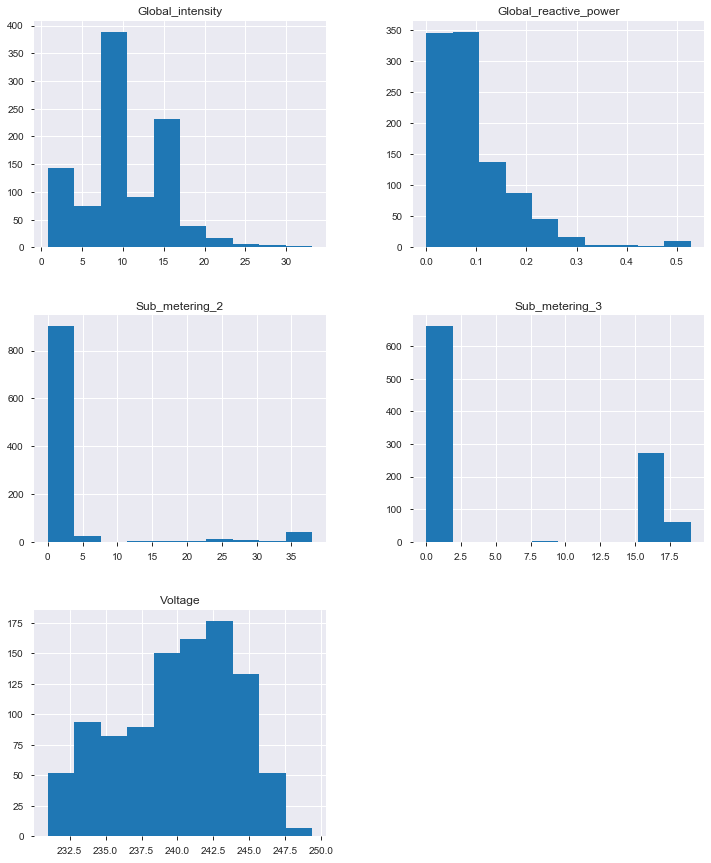

In [18]:
## Shows distribution of the variables
df.hist(figsize=(12, 15))
plt.show()

## Question: Perform EDA and check if you can find any correlation between columns

In [19]:
df

,Date,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,0.418,234.84,18.4,1.0,17.0
1,16/12/2006,17:25:00,0.436,233.63,23.0,1.0,16.0
2,16/12/2006,17:26:00,0.498,233.29,23.0,2.0,17.0
3,16/12/2006,17:27:00,0.502,233.74,23.0,1.0,17.0
4,16/12/2006,17:28:00,0.528,235.68,15.8,1.0,17.0
...,...,...,...,...,...,...,...
994,17/12/2006,09:58:00,0.056,238.09,9.6,0.0,0.0
995,17/12/2006,09:59:00,0.054,238.13,9.6,0.0,0.0
996,17/12/2006,10:00:00,0.054,238.03,9.6,0.0,0.0
997,17/12/2006,10:01:00,0.000,240.26,2.4,0.0,0.0


In [21]:
df.corr()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
Global_reactive_power,1.000000,-0.063961,0.141408,0.135622,-0.005987
Voltage,-0.063961,1.000000,-0.710019,-0.118796,-0.697866
Global_intensity,0.141408,-0.710019,1.000000,0.430683,0.538529
Sub_metering_2,0.135622,-0.118796,0.430683,1.000000,-0.100483
Sub_metering_3,-0.005987,-0.697866,0.538529,-0.100483,1.000000


<Figure size 864x360 with 0 Axes>

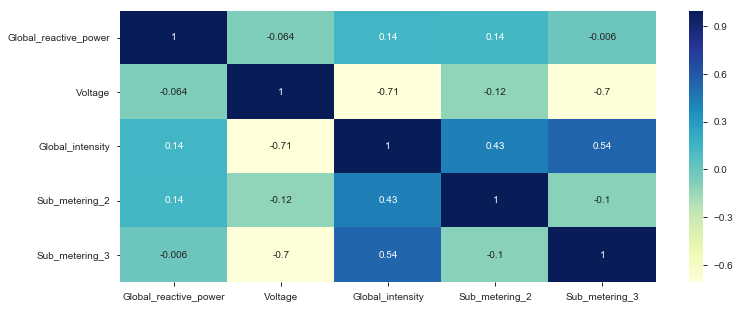

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

## Question : Identify optimal number of clusters using Elbow Method

In [24]:
ssw=[]
df_kmeans = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']]
for i in range(1,9):
    k_model = KMeans(n_clusters=i, random_state= 43, max_iter=300)
    k_model.fit(df_kmeans)
    ssw.append(k_model.inertia_)
    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

In [25]:
ssw = pd.DataFrame({"no of the cluster":range(1,9), "SSW":ssw})
ssw

,no of the cluster,SSW
0,1,173331.739640
1,2,91745.493730
2,3,28010.740116
3,4,20753.661874
4,5,17438.032351
5,6,14349.699962
6,7,11910.462384
7,8,10467.227911


## Question : Visualize the clusters and come up with your analysis

<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'sum squared within')

Text(0.5, 1.0, 'Elbow method to find optimal number of clusters')

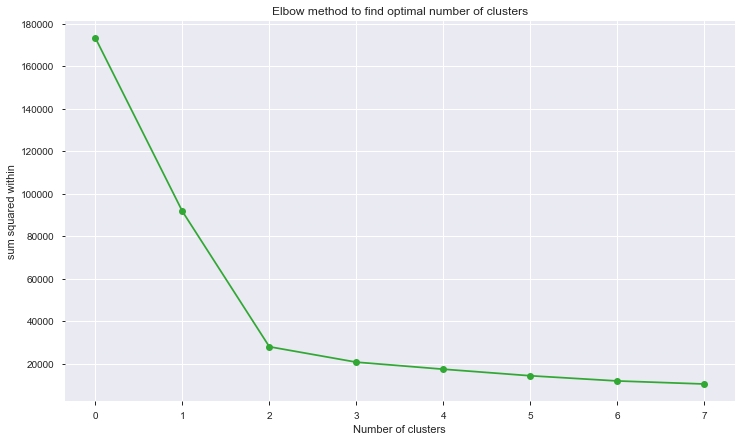

In [26]:
plt.figure(figsize=(12,7))
plt.plot(ssw['SSW'] ,marker='o', color ='#32a834')
plt.xlabel("Number of clusters")
plt.ylabel("sum squared within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

In [27]:
k_model_3 = KMeans(n_clusters=3, random_state= 43, max_iter=300)
k_model_3.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

In [72]:
df_kmeans_value = df_kmeans.values

In [29]:
df_kmeans['clusters'] =  k_model_3.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
print(k_model_3.cluster_centers_)

[[8.73311367e-02 2.42381269e+02 7.53871499e+00 6.45799012e-01
  2.30642504e-02]
 [8.74662577e-02 2.35988957e+02 1.40134969e+01 7.14723926e-01
  1.70429448e+01]
 [1.15878788e-01 2.38491061e+02 1.80787879e+01 3.21818182e+01
  2.54545455e+00]]


In [82]:
# xy = pd.DataFrame({"Cluster Number":range(0,2),"No of points":df_kmeans.clusters.value_counts()})
xy = pd.DataFrame(df_kmeans.clusters.value_counts())
xy

,clusters
0,607
1,326
2,66


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


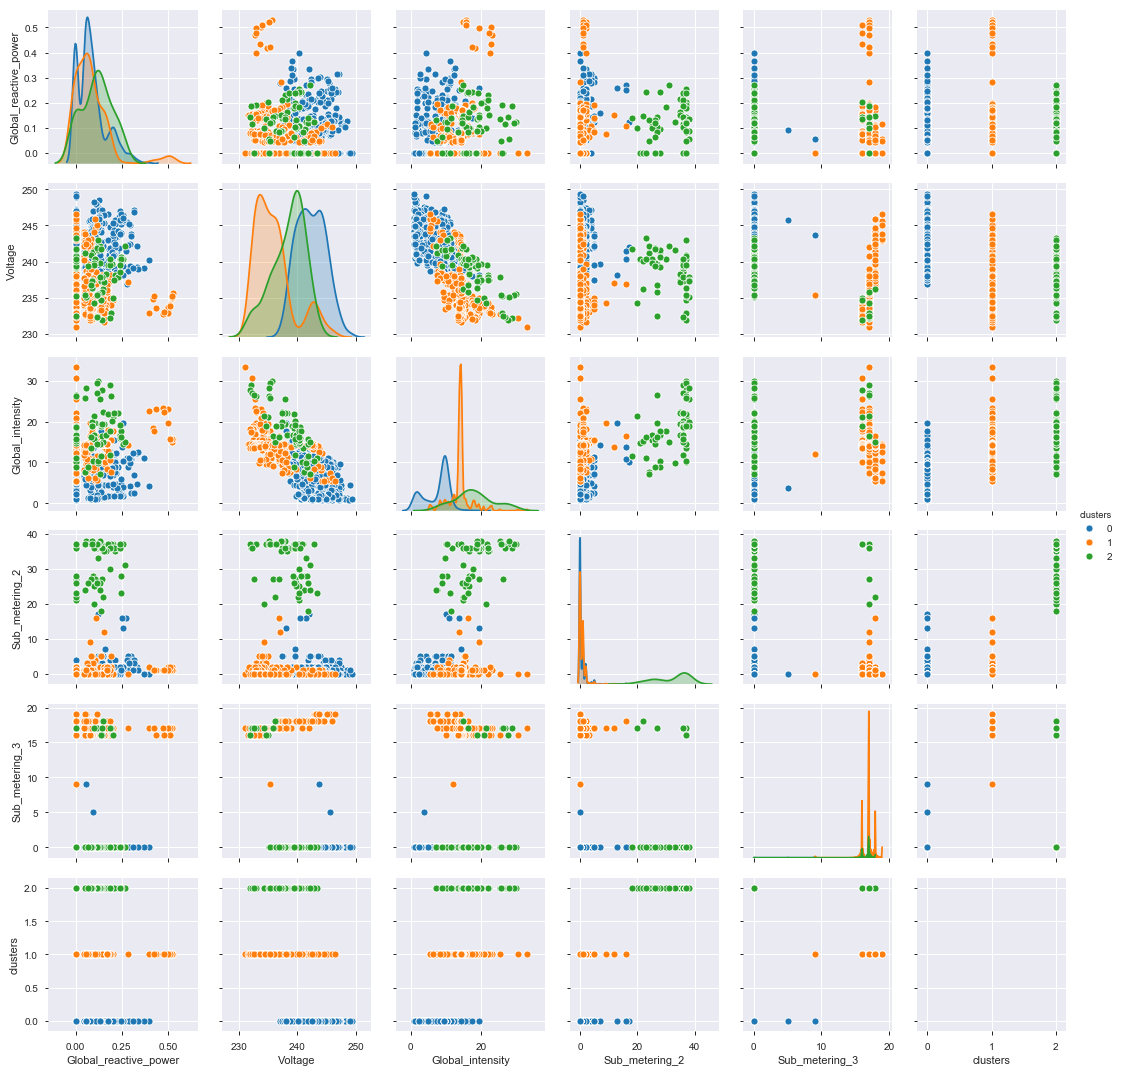

In [31]:
sns.pairplot(df_kmeans, hue="clusters")
plt.show()

Text(0.5, 1.0, 'Cluster of Power Consumption for Sub_metering_3')

Text(0.5, 0, 'Global_active_power')

Text(0, 0.5, 'Sub_metering_3')

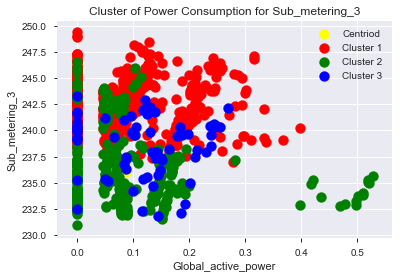

In [77]:
plt.scatter(k_model_3.cluster_centers_[:,0] , k_model_3.cluster_centers_[:,1],   s=100, c='yellow', label='Centriod')
plt.scatter(df_kmeans_value[df_kmeans['clusters'] == 0, 0], df_kmeans_value[df_kmeans['clusters'] == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_kmeans_value[df_kmeans['clusters'] == 1, 0], df_kmeans_value[df_kmeans['clusters'] == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(df_kmeans_value[df_kmeans['clusters'] == 2, 0], df_kmeans_value[df_kmeans['clusters'] == 2, 1], s=100, c='blue', label='Cluster 3')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='cyan', label='Cluster 3')

plt.title('Cluster of Power Consumption for Sub_metering_3')
plt.xlabel('Global_active_power')
plt.ylabel('Sub_metering_3')
plt.legend()
plt.show()

In [67]:
df_kmeans[df_kmeans['clusters'] == 1, 0]

TypeError: '(0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
Name: clusters, Length: 999, dtype: bool, 0)' is an invalid key

In [56]:
k_model_3.cluster_centers_[:,1]

array([242.38126853, 235.98895706, 238.49106061])

array([[4.1800e-01, 2.3484e+02, 1.8400e+01, 1.0000e+00, 1.7000e+01,
        1.0000e+00],
       [4.3600e-01, 2.3363e+02, 2.3000e+01, 1.0000e+00, 1.6000e+01,
        1.0000e+00],
       [4.9800e-01, 2.3329e+02, 2.3000e+01, 2.0000e+00, 1.7000e+01,
        1.0000e+00],
       ...,
       [5.4000e-02, 2.3803e+02, 9.6000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 2.4026e+02, 2.4000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 2.4015e+02, 2.4000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

### The End